In [46]:
import pandas as pd
import matplotlib.pyplot as plt 
import pandas as pd
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
df = pd.read_csv('selected_features_without_text.csv')
embeddings = pd.read_csv('clean_embeddings.csv')

In [47]:
df = pd.merge(df, embeddings, on='reviewID', how='inner')

In [48]:
df = df.drop(columns=["Unnamed: 0","reviewID", "restaurantID"])

In [49]:
df['reviewRating_1'] = df['reviewRating_1'].astype(int)
df['reviewRating_2'] = df['reviewRating_2'].astype(int)
df['reviewRating_3'] = df['reviewRating_3'].astype(int)
df['reviewRating_4'] = df['reviewRating_4'].astype(int)
df['reviewRating_5'] = df['reviewRating_5'].astype(int)

In [51]:
df['embedding'] = df['embedding_clean'].apply(ast.literal_eval)

In [52]:
embedding_columns = pd.DataFrame(df['embedding'].to_list(), columns=[f'embedding_{i}' for i in range(768)])

In [64]:
X = df.drop(['flagged','embedding', 'embedding_clean'], axis=1) 
y = df.flagged

In [65]:
X = pd.concat([X, embedding_columns], axis=1)

In [66]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
split = splitter.split(X, groups=X['reviewerID'])
train_inds, test_inds = next(split)

X_train = X.iloc[train_inds]
X_test = X.iloc[test_inds]
y_train = y.iloc[train_inds]
y_test = y.iloc[test_inds]

In [67]:
X_train = X_train.drop(['reviewerID'], axis = 1)

In [68]:
X_test = X_test.drop(['reviewerID'], axis = 1)

In [69]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification, adjust activation accordingly
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])  # For binary classification

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/100
666/666 [==============================] - 1s 1ms/step - loss: 0.7335 - recall: 0.1124 - val_loss: 0.4748 - val_recall: 0.1408
Epoch 2/100
666/666 [==============================] - 1s 861us/step - loss: 0.4767 - recall: 0.1872 - val_loss: 0.5035 - val_recall: 0.0657
Epoch 3/100
666/666 [==============================] - 1s 840us/step - loss: 0.4563 - recall: 0.2341 - val_loss: 0.4674 - val_recall: 0.4684
Epoch 4/100
666/666 [==============================] - 1s 829us/step - loss: 0.4416 - recall: 0.2751 - val_loss: 0.5812 - val_recall: 0.0301
Epoch 5/100
666/666 [==============================] - 1s 945us/step - loss: 0.4338 - recall: 0.3037 - val_loss: 0.4402 - val_recall: 0.5229
Epoch 6/100
666/666 [==============================] - 1s 862us/step - loss: 0.4237 - recall: 0.3331 - val_loss: 0.4203 - val_recall: 0.2864
Epoch 7/100
666/666 [==============================] - 1s 840us/step - loss: 0.4136 - recall: 0.3601 - val_loss: 0.4115 - val_recall: 0.3805
Epoch 8/100
666

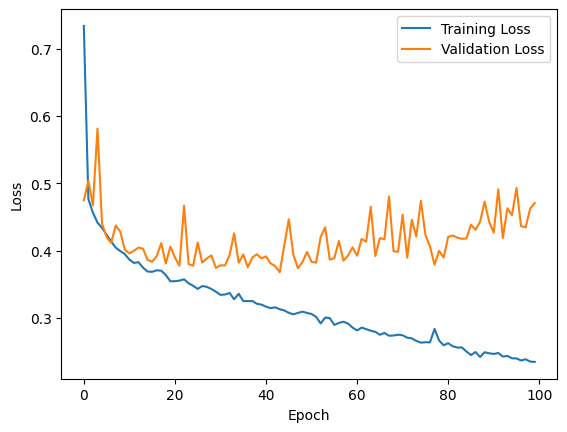

In [70]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [73]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification, adjust activation accordingly
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])  # For binary classification

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/40
666/666 [==============================] - 1s 951us/step - loss: 0.5116 - recall: 0.1826 - val_loss: 0.5106 - val_recall: 0.5522
Epoch 2/40
666/666 [==============================] - 1s 823us/step - loss: 0.4681 - recall: 0.2576 - val_loss: 0.4569 - val_recall: 0.4858
Epoch 3/40
666/666 [==============================] - 1s 807us/step - loss: 0.4466 - recall: 0.2944 - val_loss: 0.4425 - val_recall: 0.1804
Epoch 4/40
666/666 [==============================] - 1s 883us/step - loss: 0.4321 - recall: 0.3123 - val_loss: 0.4473 - val_recall: 0.1756
Epoch 5/40
666/666 [==============================] - 1s 899us/step - loss: 0.4311 - recall: 0.3356 - val_loss: 0.4504 - val_recall: 0.6084
Epoch 6/40
666/666 [==============================] - 1s 926us/step - loss: 0.4137 - recall: 0.3646 - val_loss: 0.4199 - val_recall: 0.2310
Epoch 7/40
666/666 [==============================] - 1s 902us/step - loss: 0.4133 - recall: 0.3755 - val_loss: 0.4283 - val_recall: 0.2176
Epoch 8/40
666/666 [

166/166 [==============================] - 0s 536us/step


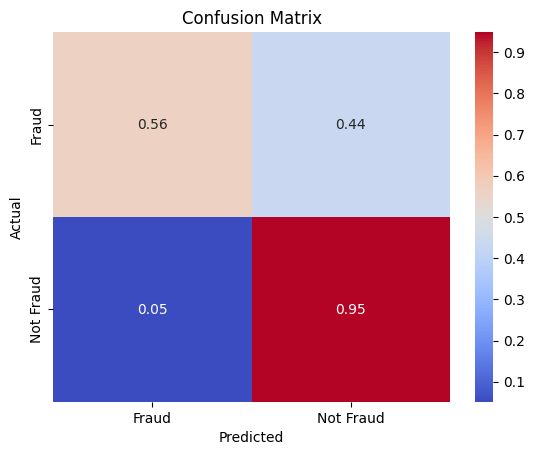

Confusion Matrix:
[[0.56396217 0.43603783]
 [0.05142405 0.94857595]]
Accuracy: 0.6560015145778114
Precision: 0.4063029481531684
Recall: 0.9485759493670886
F1-Score: 0.568920521945433


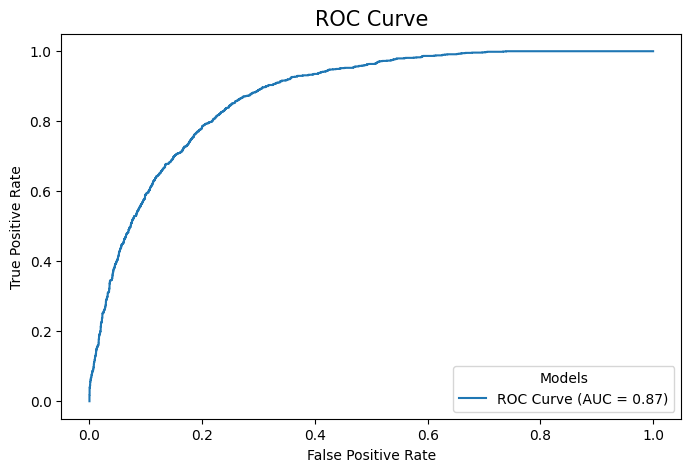

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns

y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.10).astype(int)  # Adjust threshold as needed

# Convert y_test to binary (if it's not already)
y_test_binary = (y_test > 0.10).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary,normalize = 'true')
sns.heatmap(conf_matrix,annot=True,fmt=".2f", cmap="coolwarm", xticklabels=["Fraud", "Not Fraud"], yticklabels=["Fraud", "Not Fraud"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test_binary, y_pred_binary)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test_binary, y_pred_binary)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test_binary, y_pred_binary)
print(f"F1-Score: {f1}")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred)
auc = roc_auc_score(y_test_binary, y_pred)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=15)
plt.show()
